# tmdb-movies data investigation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this notebook i will anlayze the tmdb-movies data set to investigate what are the trends assossiated with higher profit  and trends in movies through out the years.

# Importing libararies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None
pltSize = (12,8)

<a id='wrangling'></a>
## Data Wrangling

1) I read the data<br>
2) Checked the head of the data frame to see if loading happend correctly.

In [2]:
tmdbMovies = pd.read_csv("tmdb-movies .csv")
tmdbMovies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Since iam not going to need "homepage", "tagline","keywords", "overview" columns in my analysis i'm going to drop them.

In [3]:
tmdbMovies.drop(["homepage", "tagline","keywords", "overview" ],axis = 1, inplace = True)

In [4]:
tmdbMovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 17 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(6), object(7)
memory usage: 1.4+ MB


From the data frameinfo we can see that some movies are missing their imdb_id so i wanted to check them.

In [5]:
tmdbMovies.loc[tmdbMovies.imdb_id.isna()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
548,355131,NaN,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,25,Documentary|Science Fiction,Netflix,8/10/15,12,7.5,2015,0.000000,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,Steward Lee|Steven G. Lee,44,NaN,NaN,10/3/14,13,6.8,2014,0.000000,0.0
1528,15257,NaN,0.607851,0,0,Hulk vs. Wolverine,Fred Tatasciore|Bryce Johnson|Steve Blum|Nolan...,Frank Paur,38,Animation|Action|Science Fiction,Marvel Studios,1/27/09,38,6.9,2009,0.000000,0.0
1750,101907,NaN,0.256975,0,0,Hulk vs. Thor,Graham McTavish|Fred Tatasciore|Matthew Wolf|J...,Sam Liu,41,Action|Animation|Fantasy|Science Fiction,Marvel Studios,1/27/09,38,6.4,2009,0.000000,0.0
2401,45644,NaN,0.067753,0,0,Opeth: In Live Concert At The Royal Albert Hall,"Mikael Ã…kerfeldt|Martin ""Axe"" Axenrot|Martin ...",NaN,163,Music,NaN,9/21/10,10,8.6,2010,0.000000,0.0
4797,369145,NaN,0.167501,0,0,Doctor Who: The Snowmen,Matt Smith|Jenna Coleman|Richard E. Grant|Ian ...,NaN,60,NaN,BBC Television UK,12/25/12,10,7.8,2012,0.000000,0.0
4872,269177,NaN,0.090552,0,0,Party Bercy,Florence Foresti,NaN,120,Comedy,TF1 VidÃ©o,9/23/12,15,6.4,2012,0.000000,0.0
6071,279954,NaN,0.004323,500,0,Portal: Survive!,Monique Blanchard|Bradley Mixon,Connor McGuire|Colin McGuire,7,Action|Science Fiction,NaN,10/8/13,11,7.5,2013,468.016676,0.0
7527,50127,NaN,0.570337,0,0,Fallen: The Journey,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,Mikael Salomon,80,Action|Adventure|Drama|Fantasy|Family,NaN,1/1/07,11,7.3,2007,0.000000,0.0
7809,50128,NaN,0.060795,0,0,Fallen: The Destiny,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,Mikael Salomon,80,Adventure|Fantasy|Drama|Action|Science Fiction,NaN,1/1/07,13,7.0,2007,0.000000,0.0


After checking them we can see that they are missing values besides the imdb_id so i decided to drop them.

In [6]:
tmdbMovies = tmdbMovies.loc[tmdbMovies.imdb_id.isna() == False]

In [7]:
tmdbMovies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10856 entries, 0 to 10865
Data columns (total 17 columns):
id                      10856 non-null int64
imdb_id                 10856 non-null object
popularity              10856 non-null float64
budget                  10856 non-null int64
revenue                 10856 non-null int64
original_title          10856 non-null object
cast                    10780 non-null object
director                10816 non-null object
runtime                 10856 non-null int64
genres                  10835 non-null object
production_companies    9831 non-null object
release_date            10856 non-null object
vote_count              10856 non-null int64
vote_average            10856 non-null float64
release_year            10856 non-null int64
budget_adj              10856 non-null float64
revenue_adj             10856 non-null float64
dtypes: float64(4), int64(6), object(7)
memory usage: 1.5+ MB


From the data frame info we can see that some movies are missing their genre : exactly 21 movies are missing their genre, so i dcided to drop the movies that are missing their genre.

In [8]:
tmdbMovies.loc[tmdbMovies.genres.isna()].shape[0]

21

In [9]:
tmdbMovies = tmdbMovies.loc[tmdbMovies.genres.isna() == False]

since i will need profit in my investigation i calculated both original profit and profit_adj which is adjusted profit for older movies according to the current economy.

In [10]:
tmdbMovies['profit_adj'] = tmdbMovies.revenue_adj - tmdbMovies.budget_adj
tmdbMovies['profit'] = tmdbMovies.revenue - tmdbMovies.budget
tmdbMovies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,1363528810
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,228436354
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08,185238201
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09,1868178225
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09,1316249360


From the information above i doubted that many data points are missing their revenue and budget which i will need in the investgation so i wanted to check taht out.

In [11]:
tmdbMovies2 = tmdbMovies.loc[np.logical_and(tmdbMovies.budget != 0, tmdbMovies.revenue != 0)]

In [12]:
tmdbMovies2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 10848
Data columns (total 19 columns):
id                      3855 non-null int64
imdb_id                 3855 non-null object
popularity              3855 non-null float64
budget                  3855 non-null int64
revenue                 3855 non-null int64
original_title          3855 non-null object
cast                    3851 non-null object
director                3854 non-null object
runtime                 3855 non-null int64
genres                  3855 non-null object
production_companies    3809 non-null object
release_date            3855 non-null object
vote_count              3855 non-null int64
vote_average            3855 non-null float64
release_year            3855 non-null int64
budget_adj              3855 non-null float64
revenue_adj             3855 non-null float64
profit_adj              3855 non-null float64
profit                  3855 non-null int64
dtypes: float64(5), int64(7), object(7)

<a id='eda'></a>
## Exploratory Data Analysis

So the data point aren't missing their revenue and budget are 3855 entries which i wnted to see their statistial properities.

In [13]:
tmdbMovies2[["budget","revenue","revenue_adj","budget_adj", "profit", "profit_adj"]].describe()

,budget,revenue,revenue_adj,budget_adj,profit,profit_adj
count,3.855000e+03,3.855000e+03,3.855000e+03,3.855000e+03,3.855000e+03,3.855000e+03
mean,3.720183e+07,1.076589e+08,1.370294e+08,4.423630e+07,7.045710e+07,9.279309e+07
std,4.220291e+07,1.765248e+08,2.160944e+08,4.480403e+07,1.506085e+08,1.940562e+08
min,1.000000e+00,2.000000e+00,2.370705e+00,9.693980e-01,-4.139124e+08,-4.139124e+08
25%,1.000000e+07,1.357645e+07,1.834123e+07,1.309053e+07,-1.325776e+06,-1.507157e+06
50%,2.400000e+07,4.479322e+07,6.171861e+07,3.001558e+07,2.000718e+07,2.736550e+07
75%,5.000000e+07,1.241530e+08,1.632401e+08,6.061307e+07,8.168326e+07,1.074152e+08
max,4.250000e+08,2.781506e+09,2.827124e+09,4.250000e+08,2.544506e+09,2.750137e+09


Here i wanted to see how each feature of "budget","revenue","revenue_adj","budget_adj","profit", "profit_adj" is ditributed.

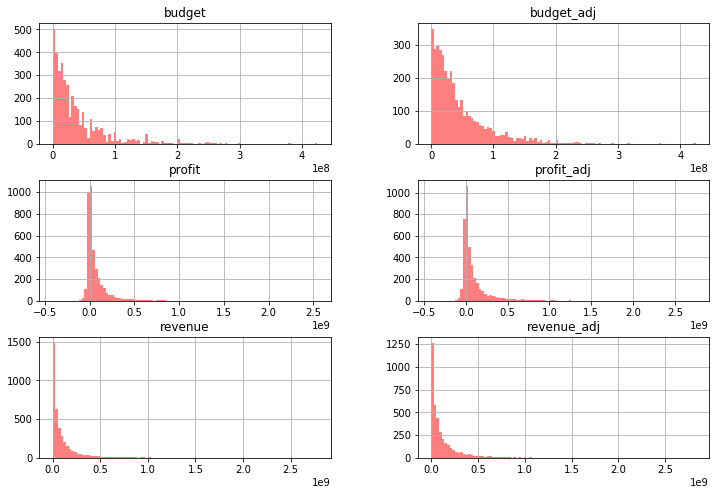

In [14]:
tmdbMovies2[["budget","revenue","revenue_adj","budget_adj","profit", "profit_adj"]].hist(figsize = pltSize, bins = 100, color = 'red', alpha = 0.5);

when can see that money related features are all sekwed to the right and not normally distributed which means that we have outliers for each of the categories.

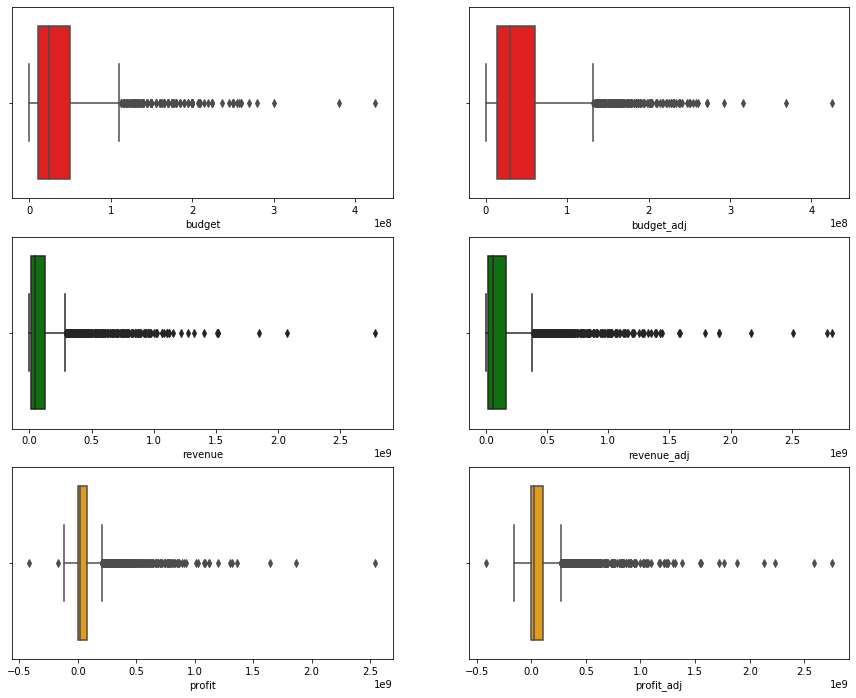

In [15]:
fig, ax = plt.subplots(3,2,figsize=(15, 12))
sns.boxplot(tmdbMovies2.budget, ax = ax[0][0], color = 'red');
sns.boxplot(tmdbMovies2.budget_adj, ax = ax[0][1], color = 'red');
sns.boxplot(tmdbMovies2.revenue, ax = ax[1][0], color = 'green');
sns.boxplot(tmdbMovies2.revenue_adj, ax = ax[1][1], color = 'green');
sns.boxplot(tmdbMovies2.profit, ax = ax[2][0], color = 'orange');
sns.boxplot(tmdbMovies2.profit_adj, ax = ax[2][1], color = 'orange');

we can see that all features of interest have outliers so let's check them out.

In [16]:
Q1 = tmdbMovies2.quantile(0.25)
Q3 = tmdbMovies2.quantile(0.75)
IQR = Q3 - Q1
IQR

id              3.250300e+04
popularity      9.057970e-01
budget          4.000000e+07
revenue         1.105765e+08
runtime         2.400000e+01
vote_count      5.090000e+02
vote_average    1.000000e+00
release_year    1.500000e+01
budget_adj      4.752254e+07
revenue_adj     1.448989e+08
profit_adj      1.089224e+08
profit          8.300903e+07
dtype: float64

# Budget, revenue, profit outliers

In [17]:
tmdbMovies2.loc[ tmdbMovies2.budget > (Q3.budget + 1.5 * IQR.budget), ['original_title','budget']]

,original_title,budget
0,Jurassic World,150000000
1,Mad Max: Fury Road,150000000
3,Star Wars: The Force Awakens,200000000
4,Furious 7,190000000
5,The Revenant,135000000
...,...,...
8730,The Perfect Storm,120000000
8970,Armageddon,140000000
8977,A Bug's Life,120000000
8995,Lethal Weapon 4,140000000


In [18]:
tmdbMovies2.loc[tmdbMovies2.budget < (Q1.budget - 1.5 * IQR.budget), ['original_title','budget']]

,original_title,budget


In [19]:
tmdbMovies2.loc[ tmdbMovies2.revenue > (Q3.revenue + 1.5 * IQR.revenue), ['original_title','revenue']]

,original_title,revenue
0,Jurassic World,1513528810
1,Mad Max: Fury Road,378436354
2,Insurgent,295238201
3,Star Wars: The Force Awakens,2068178225
4,Furious 7,1506249360
...,...,...
10226,The Fugitive,368875760
10475,Top Gun,356830601
10499,Crocodile Dundee,328203506
10594,The Exorcist,441306145


In [20]:
tmdbMovies2.loc[tmdbMovies2.revenue < (Q1.budget - 1.5 * IQR.revenue), ['original_title','revenue']]

,original_title,revenue


In [21]:
tmdbMovies2.loc[tmdbMovies2.profit < (Q1.profit - 1.5 * IQR.profit), ['original_title','profit']]

,original_title,profit
2244,The Warrior's Way,-413912431
5508,The Lone Ranger,-165710090


In [22]:
tmdbMovies2.loc[ tmdbMovies2.profit > (Q3.profit + 1.5 * IQR.profit), ['original_title','profit']]

,original_title,profit
0,Jurassic World,1363528810
1,Mad Max: Fury Road,228436354
3,Star Wars: The Force Awakens,1868178225
4,Furious 7,1316249360
5,The Revenant,397950503
...,...,...
10312,Indecent Proposal,228614059
10475,Top Gun,341830601
10499,Crocodile Dundee,323203506
10594,The Exorcist,433306145


From the above analysis we can see the outliers upclose and as we've seen in the box plots that only profit have outliers less than lower bound.

# Companies

In [23]:
tmdbMovies.production_companies.head()

0    Universal Studios|Amblin Entertainment|Legenda...
1    Village Roadshow Pictures|Kennedy Miller Produ...
2    Summit Entertainment|Mandeville Films|Red Wago...
3            Lucasfilm|Truenorth Productions|Bad Robot
4    Universal Pictures|Original Film|Media Rights ...
Name: production_companies, dtype: object

 which group of production companies have the most revenue of all time?

In [24]:
movies = tmdbMovies.loc[:,['original_title','production_companies','revenue_adj']]
movies.loc[movies.revenue_adj == movies.revenue_adj.max()]

,original_title,production_companies,revenue_adj
1386,Avatar,Ingenious Film Partners|Twentieth Century Fox ...,2.827124e+09


Each movie is produced by a collection of companies so i wanted to separate them in order to learn more about each company.

In [25]:
prodCompanies = tmdbMovies['production_companies'].str.split('|').apply(pd.Series, 1).stack()
prodCompanies.index = prodCompanies.index.droplevel(-1)
prodCompanies.name = 'production_companies'
del tmdbMovies['production_companies']
MoviesSplitPC = tmdbMovies.join(prodCompanies)

In [26]:
MoviesSplitPC.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj,profit,production_companies
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,1363528810,Universal Studios
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,1363528810,Amblin Entertainment
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,1363528810,Legendary Pictures
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,1363528810,Fuji Television Network
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,1363528810,Dentsu


List of all the companies in the data.

In [27]:
list(MoviesSplitPC['production_companies'].unique())

['Universal Studios',
 'Amblin Entertainment',
 'Legendary Pictures',
 'Fuji Television Network',
 'Dentsu',
 'Village Roadshow Pictures',
 'Kennedy Miller Productions',
 'Summit Entertainment',
 'Mandeville Films',
 'Red Wagon Entertainment',
 'NeoReel',
 'Lucasfilm',
 'Truenorth Productions',
 'Bad Robot',
 'Universal Pictures',
 'Original Film',
 'Media Rights Capital',
 'One Race Films',
 'Regency Enterprises',
 'Appian Way',
 'CatchPlay',
 'Anonymous Content',
 'New Regency Pictures',
 'Paramount Pictures',
 'Skydance Productions',
 'Twentieth Century Fox Film Corporation',
 'Scott Free Productions',
 'Mid Atlantic Films',
 'International Traders',
 'TSG Entertainment',
 'Illumination Entertainment',
 'Walt Disney Pictures',
 'Pixar Animation Studios',
 'Walt Disney Studios Motion Pictures',
 'Columbia Pictures',
 'Danjaq',
 'B24',
 'Dune Entertainment',
 'Anarchos Productions',
 'Warner Bros.',
 'DNA Films',
 'Universal Pictures International (UPI)',
 'Film4',
 'Happy Madison Pro

How many movies produced by each company?

In [28]:
# Top 10 companies when it comes to amount of movies produced.
MoviesSplitPC['production_companies'].value_counts()[0:10]

Universal Pictures                        522
Warner Bros.                              509
Paramount Pictures                        431
Twentieth Century Fox Film Corporation    282
Columbia Pictures                         272
New Line Cinema                           219
Metro-Goldwyn-Mayer (MGM)                 218
Walt Disney Pictures                      213
Touchstone Pictures                       178
Columbia Pictures Corporation             160
Name: production_companies, dtype: int64

# Relationship between count of movies produced by a company and profit

In [29]:
countPerCompany = pd.DataFrame(MoviesSplitPC.groupby('production_companies')['id'].agg('count'))
totalProfit = pd.DataFrame(MoviesSplitPC.groupby('production_companies')['profit'].agg('sum'))
productionCompanies = totalProfit.join(countPerCompany).reset_index()
productionCompanies = productionCompanies.rename(columns = {'id':'count_of_movies'})
productionCompanies.loc[productionCompanies.production_companies == 'Universal Pictures']

,production_companies,profit,count_of_movies
7367,Universal Pictures,32575422791,522


In [30]:
productionCompanies.head()

,production_companies,profit,count_of_movies
0,"""DIA"" Productions GmbH & Co. KG",8350926,1
1,# Lexyn Productions,0,1
2,10 West Studios,0,1
3,100 Feet Productions,-10000000,1
4,1019 Entertainment,801508,1


In [31]:
productionCompanies.corr()

,profit,count_of_movies
profit,1.000000,0.899197
count_of_movies,0.899197,1.000000


We can see that there is apositive correlation between profit and amount of movies produced so let's visualize that.

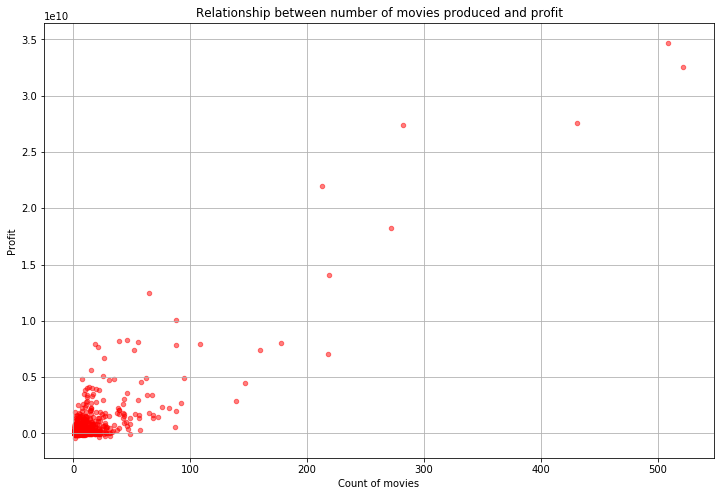

In [32]:
productionCompanies.plot.scatter(x = 'count_of_movies', y ='profit',figsize = pltSize, alpha = 0.5, c = 'red');
plt.title('Relationship between number of movies produced and profit');
plt.xlabel('Count of movies');
plt.ylabel('Profit');
plt.grid(None);

# Genres

In [33]:
tmdbMovies = tmdbMovies.loc[tmdbMovies.genres.notna()]
tmdbMovies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10835 entries, 0 to 10865
Data columns (total 18 columns):
id                10835 non-null int64
imdb_id           10835 non-null object
popularity        10835 non-null float64
budget            10835 non-null int64
revenue           10835 non-null int64
original_title    10835 non-null object
cast              10760 non-null object
director          10796 non-null object
runtime           10835 non-null int64
genres            10835 non-null object
release_date      10835 non-null object
vote_count        10835 non-null int64
vote_average      10835 non-null float64
release_year      10835 non-null int64
budget_adj        10835 non-null float64
revenue_adj       10835 non-null float64
profit_adj        10835 non-null float64
profit            10835 non-null int64
dtypes: float64(5), int64(7), object(6)
memory usage: 1.6+ MB


### Which genres are more popular from year to year?

In [34]:
MoviesGenres = tmdbMovies['genres'].copy().str.split('|').apply(pd.Series, 1).stack()
MoviesGenres.index = MoviesGenres.index.droplevel(-1)
MoviesGenres.name = 'movies_genres'
MoviesGenres

0                 Action
0              Adventure
0        Science Fiction
0               Thriller
1                 Action
              ...       
10863            Mystery
10863             Comedy
10864             Action
10864             Comedy
10865             Horror
Name: movies_genres, Length: 26937, dtype: object

In [35]:
MoviesGenres = tmdbMovies.loc[:,["release_year","popularity"]].copy().join(MoviesGenres)
MoviesGenres = MoviesGenres.groupby(['release_year',"movies_genres"])['popularity'].sum()
MoviesGenres = MoviesGenres.reset_index().set_index('release_year')
highestGenre = pd.DataFrame(columns = ['release_year','movies_genres','popularity'])
release_year = []
movies_genres = []
popularity = []
for data in MoviesGenres.index.unique():
    x = MoviesGenres.loc[MoviesGenres.popularity==MoviesGenres.loc[MoviesGenres.index == data,'popularity'].max(),:]
    release_year.append(x.index.values[0])
    movies_genres.append(x.movies_genres.values[0])
    popularity.append(x.popularity.values[0])

highestGenre['release_year'] = release_year
highestGenre['movies_genres'] = movies_genres 
highestGenre['popularity'] = popularity
highestGenre

,release_year,movies_genres,popularity
0,1960,Drama,7.361967
1,1961,Drama,6.915731
2,1962,Drama,8.232008
3,1963,Thriller,7.199292
4,1964,Comedy,7.859657
5,1965,Drama,6.105756
6,1966,Drama,5.436264
7,1967,Drama,8.183477
8,1968,Drama,7.546450
9,1969,Drama,6.368528


### What are the properities associated with movies that have high revenues.

In [36]:
tmdbMovies2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 10848
Data columns (total 19 columns):
id                      3855 non-null int64
imdb_id                 3855 non-null object
popularity              3855 non-null float64
budget                  3855 non-null int64
revenue                 3855 non-null int64
original_title          3855 non-null object
cast                    3851 non-null object
director                3854 non-null object
runtime                 3855 non-null int64
genres                  3855 non-null object
production_companies    3809 non-null object
release_date            3855 non-null object
vote_count              3855 non-null int64
vote_average            3855 non-null float64
release_year            3855 non-null int64
budget_adj              3855 non-null float64
revenue_adj             3855 non-null float64
profit_adj              3855 non-null float64
profit                  3855 non-null int64
dtypes: float64(5), int64(7), object(7)

In [37]:
tmdbMovies2['profit_adj'] = tmdbMovies2['revenue_adj'] - tmdbMovies2['budget_adj']
MoviesProfits = tmdbMovies2.loc[tmdbMovies2.profit_adj > tmdbMovies2.profit_adj.mean()]
MoviesProfits.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj,profit
count,1068.000000,1068.000000,1.068000e+03,1.068000e+03,1068.000000,1068.000000,1068.000000,1068.000000,1.068000e+03,1.068000e+03,1.068000e+03,1.068000e+03
mean,30949.115169,2.141194,6.351838e+07,2.887856e+08,115.782772,1207.497191,6.480618,1999.354869,7.464414e+07,3.735525e+08,2.989084e+08,2.252672e+08
std,58354.120149,2.255302,5.657162e+07,2.508539e+08,22.255347,1315.190440,0.709058,12.804584,5.586516e+07,2.932603e+08,2.720454e+08,2.154390e+08
min,11.000000,0.131526,1.130000e+02,2.500000e+07,69.000000,13.000000,4.100000,1960.000000,2.248029e+02,9.664454e+07,9.300454e+07,1.655955e+07
25%,967.750000,0.998941,2.000000e+07,1.392645e+08,99.000000,332.000000,6.000000,1993.000000,3.128147e+07,1.897329e+08,1.318853e+08,1.027163e+08
50%,9285.500000,1.555852,4.500000e+07,2.126394e+08,113.000000,727.500000,6.500000,2003.000000,6.148773e+07,2.781974e+08,2.029346e+08,1.530468e+08
75%,27297.000000,2.564112,9.000000e+07,3.521342e+08,128.000000,1611.250000,7.000000,2010.000000,1.066338e+08,4.491095e+08,3.630904e+08,2.642130e+08
max,417859.000000,32.985763,3.800000e+08,2.781506e+09,248.000000,9767.000000,8.300000,2015.000000,3.683713e+08,2.827124e+09,2.750137e+09,2.544506e+09


###  What year has seen the most releases?

In [38]:
moviesYear = tmdbMovies.groupby("release_year")
moviesYear.size().idxmax()

2014

# Directors

# Would like to find out if certain directors associated with higherer profit

In [39]:
movies = tmdbMovies.loc[:,['director', 'profit_adj', 'original_title']].copy().set_index('profit_adj')
movies.sort_index(inplace = True, ascending = False)
movies.iloc[0:21]

,director,original_title
profit_adj,,
2.750137e+09,George Lucas,Star Wars
2.586237e+09,James Cameron,Avatar
2.234714e+09,James Cameron,Titanic
2.128036e+09,William Friedkin,The Exorcist
1.878643e+09,Steven Spielberg,Jaws
1.767968e+09,Steven Spielberg,E.T. the Extra-Terrestrial
1.718723e+09,J.J. Abrams,Star Wars: The Force Awakens
1.551568e+09,Irwin Winkler,The Net
1.545635e+09,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,One Hundred and One Dalmatians


In [40]:
movies.head(100)['director'].value_counts()[0:21]

Steven Spielberg            7
Peter Jackson               6
Chris Columbus              4
David Yates                 4
George Lucas                4
Sam Raimi                   3
Christopher Nolan           3
James Cameron               3
Carlos Saldanha             2
Joss Whedon                 2
Tim Burton                  2
Guy Hamilton                2
Robert Zemeckis             2
Gore Verbinski              2
Michael Bay                 2
Kyle Balda|Pierre Coffin    1
Tony Scott                  1
Sam Mendes                  1
Pete Docter                 1
Colin Trevorrow             1
Lewis Gilbert               1
Name: director, dtype: int64

In [41]:
movies['director'].value_counts()[0:21]

Woody Allen             45
Clint Eastwood          34
Steven Spielberg        29
Martin Scorsese         29
Ridley Scott            23
Ron Howard              22
Steven Soderbergh       22
Joel Schumacher         21
Brian De Palma          20
Wes Craven              19
Barry Levinson          19
Tim Burton              19
David Cronenberg        18
John Carpenter          18
Rob Reiner              18
Mike Nichols            18
Francis Ford Coppola    17
Sidney Lumet            17
Oliver Stone            17
Robert Zemeckis         17
Walter Hill             17
Name: director, dtype: int64

# Popularity and run time

In [42]:
movies = tmdbMovies.loc[:,['runtime', 'popularity', 'original_title']].copy()
movies.head()

,runtime,popularity,original_title
0,124,32.985763,Jurassic World
1,120,28.419936,Mad Max: Fury Road
2,119,13.112507,Insurgent
3,136,11.173104,Star Wars: The Force Awakens
4,137,9.335014,Furious 7


In [43]:
movies.corr()

,runtime,popularity
runtime,1.000000,0.138337
popularity,0.138337,1.000000


As expected popularity and run time don't have a strong correlation.

# Popularity and profit

In [44]:
movies = tmdbMovies.loc[:,['popularity', 'profit_adj', 'original_title']].copy()
movies.sort_values('profit_adj',inplace = True, ascending = False)
movies.iloc[0:20]

,popularity,profit_adj,original_title
1329,12.037933,2.750137e+09,Star Wars
1386,9.432768,2.586237e+09,Avatar
5231,4.355219,2.234714e+09,Titanic
10594,2.010733,2.128036e+09,The Exorcist
9806,2.563191,1.878643e+09,Jaws
8889,2.900556,1.767968e+09,E.T. the Extra-Terrestrial
3,11.173104,1.718723e+09,Star Wars: The Force Awakens
8094,1.136610,1.551568e+09,The Net
10110,2.631987,1.545635e+09,One Hundred and One Dalmatians
7309,5.488441,1.376998e+09,The Empire Strikes Back


In [45]:
popularityQ3 = movies.popularity.quantile(0.75)
popularityQ2 = movies.popularity.quantile(0.5)
popularityQ1 = movies.popularity.quantile(0.25)
top100 = movies.iloc[0:100]
top100.shape

(100, 3)

In [46]:
top100.loc[top100.popularity > popularityQ3,:].count()[0]

95

In [47]:
top100.loc[top100.popularity < popularityQ3,:]

,popularity,profit_adj,original_title
1340,0.602862,8.404891e+08,Saturday Night Fever
10094,0.142486,7.654982e+08,Home Alone
10654,0.396028,7.537166e+08,Love Story
7073,0.672946,6.717711e+08,The Passion of the Christ
10499,0.680643,6.429831e+08,Crocodile Dundee


There are 5 movies that are below third quartile which are "Saturday Night Fever", "Home Alone", "Love Story", "The Passion of the Christ", "Crocodile Dundee".

In [48]:
top100.loc[top100.popularity > popularityQ2,:].count()[0]

99

In [49]:
top100.loc[top100.popularity > popularityQ1,:].count()[0]

99

In [50]:
top100.loc[top100.popularity < popularityQ1,:]

,popularity,profit_adj,original_title
10094,0.142486,7.654982e+08,Home Alone


We can see that top 100 movies almost all of them have popularity that lies above popularity's third quartile which means that these movies have above median ratings according to voters except "Home Alone".

# Cast and Profit

In [51]:
from collections import Counter
movies = tmdbMovies.loc[:,['cast', 'profit_adj', 'original_title']].copy()
movies.head()
movies['cast'] = movies['cast'].str.split('|')
movies.sort_values('profit_adj', ascending = False)
first_100 = movies.head(100)
actors = []
for cast in first_100.cast:
    actors += cast
first_100 = pd.Series(Counter(actors))
first_100.sort_values(ascending = False )[0:10]

Tom Hardy           4
Alicia Vikander     4
Chris Hemsworth     4
Ben Whishaw         3
Kevin James         3
Domhnall Gleeson    3
Rachel McAdams      3
Jason Statham       3
Kate Winslet        3
Forest Whitaker     2
dtype: int64

We can see that some actors appear to be apart of most profitable movies like as expected for me Tom Hardy and not expected for me is the sweedish actress Alicia Vikander.

# Geners and profit

In [52]:
tmdbMovies.genres

0        Action|Adventure|Science Fiction|Thriller
1        Action|Adventure|Science Fiction|Thriller
2               Adventure|Science Fiction|Thriller
3         Action|Adventure|Science Fiction|Fantasy
4                            Action|Crime|Thriller
                           ...                    
10861                                  Documentary
10862                       Action|Adventure|Drama
10863                               Mystery|Comedy
10864                                Action|Comedy
10865                                       Horror
Name: genres, Length: 10835, dtype: object

In [53]:
from collections import Counter
movies = tmdbMovies.loc[:,['genres', 'profit_adj', 'original_title']].copy()
movies['genres'] = movies['genres'].str.split('|')
movies.sort_values('profit_adj', ascending = False)
first_100 = movies.head(100)
Genres = []
for gen in first_100.genres:
    Genres += gen
first_100 = pd.Series(Counter(Genres))
first_100.sort_values(ascending = False )

Drama              41
Action             35
Adventure          34
Thriller           31
Comedy             28
Science Fiction    22
Crime              19
Family             12
Mystery            11
Fantasy            11
Romance            11
Animation           8
Horror              6
History             3
Music               2
Western             2
War                 2
dtype: int64

We can see that 41% of the top100 movies belong to drama genre, 35% to action and 34% to adventure.

###  What is the relationship between budget and profit?

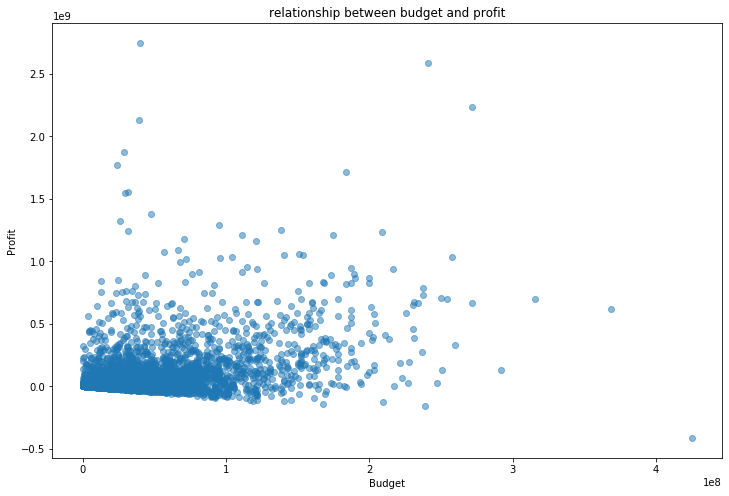

In [54]:
movies = tmdbMovies2[['original_title', 'budget_adj','profit_adj']].copy()
plt.figure(figsize = pltSize)
plt.scatter(movies.budget_adj,movies.profit_adj, alpha = 0.5)
plt.xlabel('Budget')
plt.ylabel('Profit')
plt.title('relationship between budget and profit');

In [55]:
corr = movies.corr()
corr.loc['profit_adj','budget_adj']

0.40437008479908987

In [56]:
movies['diff'] = movies.profit_adj - movies.budget_adj
movies.head()

,original_title,budget_adj,profit_adj,diff
0,Jurassic World,1.379999e+08,1.254446e+09,1.116446e+09
1,Mad Max: Fury Road,1.379999e+08,2.101614e+08,7.216141e+07
2,Insurgent,1.012000e+08,1.704191e+08,6.921911e+07
3,Star Wars: The Force Awakens,1.839999e+08,1.718723e+09,1.534723e+09
4,Furious 7,1.747999e+08,1.210949e+09,1.036149e+09


In [57]:
movies.shape

(3855, 4)

From the scatter plot we can see a positive linear correlation between budget and profit with sum oultiers where a movie have a high budget and yet small profit and vise versa, let's check them out.

In [58]:
Q1 = movies.quantile(0.25)
Q2 =  movies.quantile(0.5)
Q3 = movies.quantile(0.75)
IQR = Q3 - Q1
Q1['diff']

-24552952.098146085

In [59]:
movies.loc[movies['diff'] < (Q1['diff'] - 1.5*IQR['diff']),['original_title']]

,original_title
11,Jupiter Ascending
20,Tomorrowland
73,Pan
648,Transformers: Age of Extinction
2043,The Nutcracker: The Untold Story
...,...
9328,Hudson Hawk
10418,Doctor Dolittle
10457,55 Days at Peking
10483,Pirates


In [60]:
movies.loc[movies['diff'] > (Q3['diff'] + 1.5*IQR['diff']),['original_title']]

,original_title
0,Jurassic World
3,Star Wars: The Force Awakens
4,Furious 7
5,The Revenant
7,The Martian
...,...
10755,Grease
10756,Jaws 2
10758,Superman
10759,Halloween


# what is the run time that most movies have?

I'm going to exclude short movies from data since i mostly want to look at run time distribution of regular movies 
so I'm excluding movies with run time < 45 minutes.

In [61]:
movies = tmdbMovies.loc[tmdbMovies.runtime > 45,['runtime', 'original_title']]
movies.head()

,runtime,original_title
0,124,Jurassic World
1,120,Mad Max: Fury Road
2,119,Insurgent
3,136,Star Wars: The Force Awakens
4,137,Furious 7


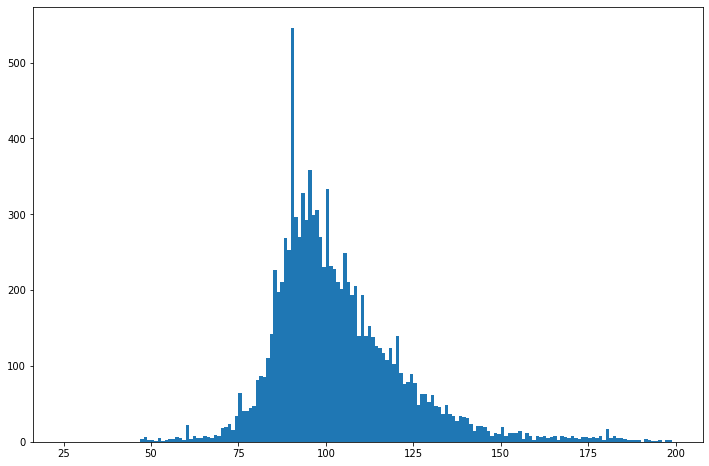

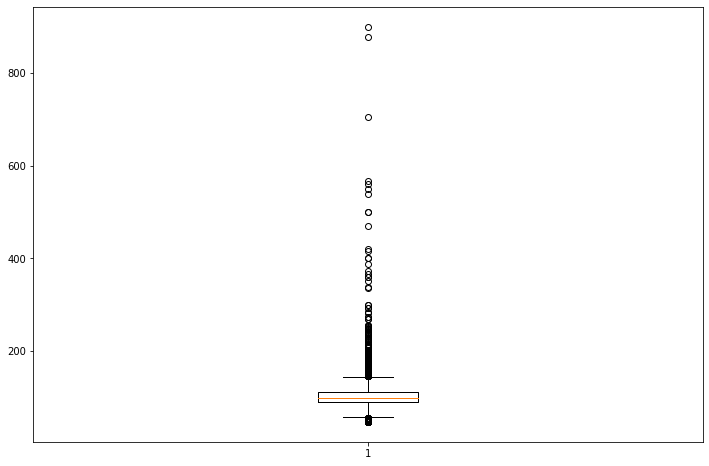

In [62]:
plt.figure(figsize = pltSize)
plt.hist(movies.runtime,bins = np.arange(25,200));
plt.figure(figsize = pltSize)
plt.boxplot(movies.runtime);

From histogram we can see that duration of movies is slightly skewed to the right and from th box plot we can see outliers,
so lets see movies that have longer/shorter run time.

In [63]:
Q1 = movies.quantile(0.25)
Q2 =  movies.quantile(0.5)
Q3 = movies.quantile(0.75)
IQR = Q3 - Q1
IQR

runtime    22.0
dtype: float64

In [64]:
movies.loc[movies['runtime'] < (Q1['runtime'] - 1.5*IQR['runtime']),['original_title']]

,original_title
181,LEGO DC Comics Super Heroes: Justice League vs...
284,A Very Murray Christmas
564,Junun
566,The Flintstones & WWE: Stone Age Smackdown
1140,JLA Adventures: Trapped in Time
1385,Emmet Otter's Jug-Band Christmas
2172,Family Guy Presents: It's a Trap!
2263,Aziz Ansari: Intimate Moments for a Sensual Ev...
2269,Life Cycles
2395,Burakku Rokku ShÅ«tÄ


In [65]:
movies.loc[movies['runtime'] > (Q3['runtime'] + 1.5*IQR['runtime']),['original_title']]

,original_title
5,The Revenant
10,Spectre
15,The Hateful Eight
40,Straight Outta Compton
415,Show Me a Hero
...,...
10762,The Deer Hunter
10824,The Bible: In the Beginning...
10835,The Sand Pebbles
10837,The Blue Max
